<a href="https://colab.research.google.com/github/JamilAlMasry/AICare-SymptomDiseaseChatbot/blob/main/AICare_MedicalChatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
import sklearn.preprocessing
import json
import warnings

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


file_path1 = '/content/drive/My Drive/Symptom2Disease.csv'
file_path2 = '/content/drive/My Drive/updatedsymptom-disease-train-dataset.csv'


df1 = pd.read_csv(file_path1)


df2 = pd.read_csv(file_path2)


df = pd.concat([df1, df2], ignore_index=True)


print(df.head())


if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis='columns', inplace=True)


df['label'] = df['label'].apply(lambda x: x.title())

df.head(2)

   Unnamed: 0      label                                               text
0         0.0  Psoriasis  I have been experiencing a skin rash on my arm...
1         1.0  Psoriasis  My skin has been peeling, especially on my kne...
2         2.0  Psoriasis  I have been experiencing joint pain in my fing...
3         3.0  Psoriasis  There is a silver like dusting on my skin, esp...
4         4.0  Psoriasis  My nails have small dents or pits in them, and...


,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."


In [ ]:
num_rows = len(df)
print("Number of rows in the DataFrame:", num_rows)


Number of rows in the DataFrame: 6834


In [ ]:
df.label.value_counts()

Cervical Spondylosis       201
Allergy                    193
Common Cold                192
Varicose Veins             190
Urinary Tract Infection    188
                          ... 
Dwarfism                     1
Tetanus                      1
Seborrheic Dermatitis        1
Esthesioneuroblastoma        1
Skin Cancer                  1
Name: label, Length: 867, dtype: int64

In [ ]:
df['label'].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken Pox',
       'Impetigo', 'Dengue', 'Fungal Infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical Spondylosis', 'Jaundice', 'Malaria',
       'Urinary Tract Infection', 'Allergy',
       'Gastroesophageal Reflux Disease', 'Drug Reaction',
       'Peptic Ulcer Disease', 'Diabetes', 'Premature Ovarian Failure',
       'Posterior Cortical Atrophy', 'Hepatitis C', 'Osteoarthristis',
       'Temporal Lobe Seizure', 'Alcoholic Hepatitis', 'Hypoglycemia',
       'Hyperthyroidism', 'Hepatitis A', 'Chronic Cholestasis',
       'Intracranial Hematoma', 'Peptic Ulcer Diseae', 'Tuberculosis',
       'Heart Attack', 'Myofascial Pain Syndrome', 'Radiation Enteritis',
       'Gastroenteritis', 'Hepatitis D', 'Hemangioma', 'Allergies',
       'Gastroparesis', 'Peripheral Artery Disease', 'Low Sperm Count',
       'Aids', 'Multiple Syste

In [ ]:
len(df['label'].unique())

867

In [ ]:
def replace_underscores(text):
    return text.replace('_', ' ')
def modify_comma(text):
    return text.replace(',', ', ')
df['text'] = df['text'].apply(replace_underscores)
df['text'] = df['text'].apply(modify_comma)

In [ ]:
print('There are', df.shape[0], 'data in this dataset')

#Checking for duplicates
print('Number of Duplicates:', len(df[df.duplicated()])) # The second dataset (updatedsymptom disease contains too many duplicates)

#Checking for missing values
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 6834 data in this dataset
Number of Duplicates: 3701
Number of Missing Values by column:
 label    0
text     0
dtype: int64
Number of Missing Values: 0


In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]


sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))


top_5_duplicate_pairs = sorted_duplicates.head(20)

top_5_duplicate_pairs

,label,text
1782,(Vertigo) Paroymsal Positional Vertigo,"headache, nausea, spinning movements, loss of ..."
2013,(Vertigo) Paroymsal Positional Vertigo,"headache, nausea, spinning movements, loss of ..."
4055,(Vertigo) Paroymsal Positional Vertigo,"headache, nausea, spinning movements, loss of ..."
4771,(Vertigo) Paroymsal Positional Vertigo,"headache, nausea, spinning movements, loss of ..."
6561,(Vertigo) Paroymsal Positional Vertigo,"headache, nausea, spinning movements, loss of ..."
2008,(Vertigo) Paroymsal Positional Vertigo,"vomiting, headache, nausea, loss of balance, u..."
2095,(Vertigo) Paroymsal Positional Vertigo,"vomiting, headache, nausea, loss of balance, u..."
3487,(Vertigo) Paroymsal Positional Vertigo,"vomiting, headache, nausea, loss of balance, u..."
3746,(Vertigo) Paroymsal Positional Vertigo,"vomiting, headache, nausea, loss of balance, u..."
3844,(Vertigo) Paroymsal Positional Vertigo,"vomiting, headache, nausea, loss of balance, u..."


In [ ]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


In [ ]:
print('There are', df.shape[0], 'data in this dataset')


print('Number of Duplicates:', len(df[df.duplicated()]))

There are 3133 data in this dataset
Number of Duplicates: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3133 entries, 0 to 6824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3133 non-null   object
 1   text    3133 non-null   object
dtypes: object(2)
memory usage: 73.4+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import re
import string

from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df.head(20)

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kn..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, es..."
4,Psoriasis,"My nails have small dents or pits in them, an..."
5,Psoriasis,The skin on my palms and soles is thickened an...
6,Psoriasis,"The skin around my mouth, nose, and eyes is ..."
7,Psoriasis,My skin is very sensitive and reacts easily to...
8,Psoriasis,I have noticed a sudden peeling of skin at dif...
9,Psoriasis,The skin on my genitals is red and inflamed. I...


In [ ]:

def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

In [ ]:
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [ ]:
df['text'] = (df['text']
                     .apply(strip_all_entities)
                     .apply(filter_chars)
                     .apply(remove_mult_spaces))

In [ ]:
df.head(20)

,label,text
0,Psoriasis,i have been experiencing a skin rash on my arm...
1,Psoriasis,my skin has been peeling especially on my knee...
2,Psoriasis,i have been experiencing joint pain in my fing...
3,Psoriasis,there is a silver like dusting on my skin espe...
4,Psoriasis,my nails have small dents or pits in them and ...
5,Psoriasis,the skin on my palms and soles is thickened an...
6,Psoriasis,the skin around my mouth nose and eyes is red ...
7,Psoriasis,my skin is very sensitive and reacts easily to...
8,Psoriasis,i have noticed a sudden peeling of skin at dif...
9,Psoriasis,the skin on my genitals is red and inflamed it...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):

    tokens = word_tokenize(text)


    stop_words = set(stopwords.words('english'))


    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]


    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['text'] = (df['text'].apply(remove_stopwords))

In [ ]:
df.head(20)

,label,text
0,Psoriasis,experiencing skin rash arms legs torso past we...
1,Psoriasis,skin peeling especially knees elbows scalp pee...
2,Psoriasis,experiencing joint pain fingers wrists knees p...
3,Psoriasis,silver like dusting skin especially lower back...
4,Psoriasis,nails small dents pits often feel inflammatory...
5,Psoriasis,skin palms soles thickened deep cracks cracks ...
6,Psoriasis,skin around mouth nose eyes red inflamed often...
7,Psoriasis,skin sensitive reacts easily changes temperatu...
8,Psoriasis,noticed sudden peeling skin different parts bo...
9,Psoriasis,skin genitals red inflamed often itchy burning...


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):

    word_list = nltk.word_tokenize(text)

    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

    return lemmatized_output

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['text'] = df['text'].apply(lemmatize_text)

In [ ]:
df.head(20)

,label,text
0,Psoriasis,experiencing skin rash arm leg torso past week...
1,Psoriasis,skin peeling especially knee elbow scalp peeli...
2,Psoriasis,experiencing joint pain finger wrist knee pain...
3,Psoriasis,silver like dusting skin especially lower back...
4,Psoriasis,nail small dent pit often feel inflammatory te...
5,Psoriasis,skin palm sol thickened deep crack crack painf...
6,Psoriasis,skin around mouth nose eye red inflamed often ...
7,Psoriasis,skin sensitive reacts easily change temperatur...
8,Psoriasis,noticed sudden peeling skin different part bod...
9,Psoriasis,skin genitals red inflamed often itchy burning...


In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head(20)

,label,text,text_length
0,Psoriasis,experiencing skin rash arm leg torso past week...,14
1,Psoriasis,skin peeling especially knee elbow scalp peeli...,12
2,Psoriasis,experiencing joint pain finger wrist knee pain...,14
3,Psoriasis,silver like dusting skin especially lower back...,15
4,Psoriasis,nail small dent pit often feel inflammatory te...,13
5,Psoriasis,skin palm sol thickened deep crack crack painf...,10
6,Psoriasis,skin around mouth nose eye red inflamed often ...,13
7,Psoriasis,skin sensitive reacts easily change temperatur...,12
8,Psoriasis,noticed sudden peeling skin different part bod...,18
9,Psoriasis,skin genitals red inflamed often itchy burning...,12


In [ ]:
text_lengths = [len(text.split()) for text in df["text"]]
import numpy as np
# Find the 95th quartile. This is used to check the distribution of words in the rows (length)
quartile_95 = np.percentile(text_lengths, 95)

print(f"95th Quartile of Text Lengths: {quartile_95}")

95th Quartile of Text Lengths: 177.0


<ipython-input-30-df0091d9cf5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_length', data=df[df['text_length']<10], palette='mako')


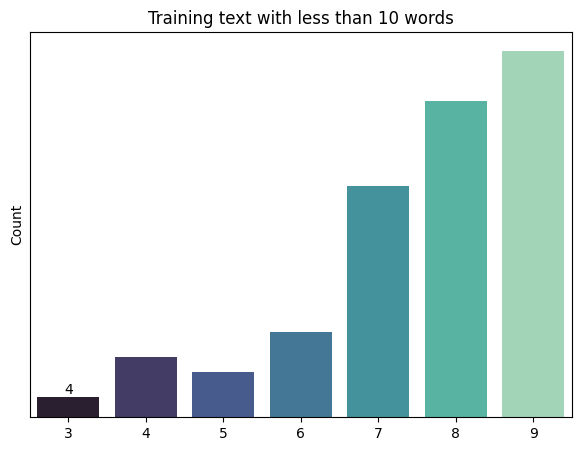

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_length', data=df[df['text_length']<10], palette='mako')
plt.title('Training text with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [ ]:
data_head=df[df['text_length']<7]
data_head.head(30)

,label,text,text_length
72,Varicose Veins,noticed bruise leg explain painful concerning,6
708,Migraine,feeling depressed irritable noticed change vision,6
916,Urinary Tract Infection,pain bladder getting,3
1222,Heart Attack,vomiting breathlessness sweating chest pain,5
1242,Gastroenteritis,vomiting sunken eye dehydration diarrhoea,5
1247,Allergy,continuous sneezing shivering chill watering eye,6
1253,Gastroenteritis,vomiting sunken eye diarrhoea,4
1260,Allergy,continuous sneezing shivering watering eye,5
1298,(Vertigo) Paroymsal Positional Vertigo,vomiting headache nausea spinning movement uns...,6
1301,Heart Attack,vomiting breathlessness chest pain,4


In [ ]:
df.label.value_counts()

Chicken Pox              100
Psoriasis                 99
Common Cold               99
Cervical Spondylosis      99
Dengue                    98
                        ... 
Dwarfism                   1
Tetanus                    1
Seborrheic Dermatitis      1
Esthesioneuroblastoma      1
Skin Cancer                1
Name: label, Length: 867, dtype: int64

In [ ]:
label_counts = df['label'].value_counts()

# Find labels with a count of 1
labels_to_remove = label_counts[label_counts == 1].index

# Remove rows with labels to remove
df = df[~df['label'].isin(labels_to_remove)]

In [ ]:
df.label.value_counts()

Chicken Pox                                100
Psoriasis                                   99
Cervical Spondylosis                        99
Common Cold                                 99
Dengue                                      98
Arthritis                                   97
Impetigo                                    97
Allergy                                     97
Drug Reaction                               96
Typhoid                                     95
Urinary Tract Infection                     95
Varicose Veins                              94
Pneumonia                                   93
Bronchial Asthma                            93
Malaria                                     92
Fungal Infection                            91
Migraine                                    91
Hypertension                                89
Gastroesophageal Reflux Disease             87
Peptic Ulcer Disease                        87
Diabetes                                    84
Jaundice     

# Trying Using BERT model
## The results reached a max of 50% as accuracy

In [ ]:

bert_preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")


tokenized_text = bert_preprocessor(df['text'])

# Padding
MAX_LENGTH = 128  # Define maximum sequence length for BERT
tokenized_text['input_word_ids'] = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text['input_word_ids'], maxlen=MAX_LENGTH, padding='post')

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(tokenized_text['input_word_ids'], df['label'], test_size=0.2, random_state=42)


label_encoder = sklearn.preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)




In [ ]:
num_classes = len(df['label'].unique())
num_classes

46

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow_hub import KerasLayer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
num_classes = len(df['label'].unique())


input_word_ids = Input(shape=(MAX_LENGTH,), dtype=tf.int32, name="input_word_ids")
input_mask = Input(shape=(MAX_LENGTH,), dtype=tf.int32, name="input_mask")
input_type_ids = Input(shape=(MAX_LENGTH,), dtype=tf.int32, name="input_type_ids")


encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True, name='bert_encoder')


outputs = encoder({'input_word_ids': input_word_ids, 'input_mask': input_mask, 'input_type_ids': input_type_ids})


pooled_output = outputs["pooled_output"]


x = Dropout(0.2)(pooled_output)


outputs = Dense(num_classes, activation='softmax', name='output')(x)


model = keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=outputs, name='medaid')


model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)


history = model.fit([X_train, X_train, X_train],
                    y_train_encoded,
                    epochs=15,
                    batch_size=32,
                    validation_data=([X_val, X_val, X_val], y_val_encoded),
                    callbacks=[early_stopping])


loss, accuracy = model.evaluate([X_val, X_val, X_val], y_val_encoded)
print("Validation Accuracy:", accuracy)

Epoch 1/15
58/58 [==============================] - 90s 868ms/step - loss: 3.5162 - accuracy: 0.0806 - val_loss: 3.0888 - val_accuracy: 0.1317
Epoch 2/15
58/58 [==============================] - 50s 865ms/step - loss: 2.9195 - accuracy: 0.2077 - val_loss: 2.5906 - val_accuracy: 0.2916
Epoch 3/15
58/58 [==============================] - 50s 869ms/step - loss: 2.5453 - accuracy: 0.2931 - val_loss: 2.2615 - val_accuracy: 0.3499
Epoch 4/15
58/58 [==============================] - 49s 846ms/step - loss: 2.2097 - accuracy: 0.3537 - val_loss: 2.1198 - val_accuracy: 0.3952
Epoch 5/15
58/58 [==============================] - 49s 848ms/step - loss: 1.9986 - accuracy: 0.4121 - val_loss: 1.9428 - val_accuracy: 0.4298
Epoch 6/15
58/58 [==============================] - 49s 848ms/step - loss: 1.8540 - accuracy: 0.4381 - val_loss: 1.9205 - val_accuracy: 0.4298
Epoch 7/15
58/58 [==============================] - 49s 847ms/step - loss: 1.7466 - accuracy: 0.4721 - val_loss: 1.8572 - val_accuracy: 0.4492

# Another Approach : Using USE (Universal Sentence Encoder)

In [ ]:
df = df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
df.head()

,label,text,text_length
2793,Dengue,skin rash joint pain vomiting fatigue high fev...,23
525,Arthritis,neck extremely tight muscle feeling extremely ...,18
4058,Diabetes,rash skin irritation especially fold skin cut ...,12
44,Psoriasis,skin changed le sensitive sensitive skin silve...,12
2522,Urinary Tract Infection,ive frequent urge urinate go bathroom pas litt...,22


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


df['label_encoded'] = le.fit_transform(df['label'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
data = {
    'Label': list(label_mapping.keys()),
    'Label Encoded': list(label_mapping.values())
}
#Converting labels into numbers

dr = pd.DataFrame(data)


dr

,Label,Label Encoded
0,(Vertigo) Paroymsal Positional Vertigo,0
1,Acne,1
2,Aids,2
3,Alcoholic Hepatitis,3
4,Allergy,4
5,Arthritis,5
6,Bronchial Asthma,6
7,Cervical Spondylosis,7
8,Chicken Pox,8
9,Chronic Cholestasis,9


In [ ]:
class_names=dr.Label.to_list()
class_names

['(Vertigo) Paroymsal  Positional Vertigo',
 'Acne',
 'Aids',
 'Alcoholic Hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical Spondylosis',
 'Chicken Pox',
 'Chronic Cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes',
 'Diabetes ',
 'Dimorphic Hemmorhoids(Piles)',
 'Dimorphic Hemorrhoids',
 'Drug Reaction',
 'Fungal Infection',
 'Gastroenteritis',
 'Gastroesophageal Reflux Disease',
 'Gerd',
 'Heart Attack',
 'Hepatitis A',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (Brain Hemorrhage)',
 'Peptic Ulcer Diseae',
 'Peptic Ulcer Disease',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary Tract Infection',
 'Varicose Veins']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['text']).reshape(-1, 1), np.array(df['label_encoded']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text', 'label_encoded']);

In [ ]:
train_os.head()

,text,label_encoded
0,skin rash joint pain vomiting fatigue high fev...,11
1,neck extremely tight muscle feeling extremely ...,5
2,rash skin irritation especially fold skin cut ...,12
3,skin changed le sensitive sensitive skin silve...,41
4,ive frequent urge urinate go bathroom pas litt...,44


In [ ]:
train_os['label_encoded'].value_counts()

11    100
26    100
29    100
8     100
42    100
18    100
10    100
13    100
28    100
3     100
22    100
21    100
5     100
0     100
24    100
31    100
14    100
37    100
9     100
2     100
36    100
30    100
33    100
20    100
25    100
16    100
12    100
41    100
44    100
34    100
17    100
1     100
7     100
15    100
43    100
32    100
35    100
23    100
19    100
39    100
6     100
4     100
40    100
45    100
27    100
38    100
Name: label_encoded, dtype: int64

In [ ]:
X = train_os['text'].to_numpy()
y = train_os['label_encoded'].to_numpy()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3680,), (920,), (3680,), (920,))

In [ ]:
X_train[:5]

array(['fatigue yellowish skin loss appetite yellowing eye family history',
       'vomiting headache nausea spinning movement unsteadiness',
       'feeling fine day suddenly developed headache chest pain dizziness driving home work hard focus concentrate road since im sure whats wrong im worried',
       'ive recently dealing itching rash skin covered pusfilled pimple blackhead skin also quite sensitive',
       'sore throat frequently sneeze sometimes skin around eye lip swell cant stop sneezing get going'],
      dtype=object)

In [ ]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()

In [ ]:
y_train_le[:5], y_valid_le[:5]

(array([24,  0, 27,  1,  4]), array([42, 29,  7,  3, 19]))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

y_train = one_hot_encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_valid = one_hot_encoder.transform(np.array(y_valid).reshape(-1, 1))

# Check what training labels look like
y_train.shape

(3680, 46)

In [ ]:
y_train, y_valid

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
round(sum([len(i.split()) for i in X_train])/len(X_train))

15

In [ ]:
text_lengths = [len(text.split()) for text in X_train]

# Find the 98th percentile
percentile_98 = np.percentile(text_lengths, 98)

print(f"98th Percentile of Text Lengths: {percentile_98}")

98th Percentile of Text Lengths: 25.420000000000073


In [ ]:
max_text_length = max(text_lengths)
print(f"Maximum Text Length: {max_text_length}")

Maximum Text Length: 1121


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
max_vocab_length =None
max_length = int(percentile_98)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(X_train)

In [ ]:

words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 1677
Top 5 most common words: ['', '[UNK]', 'pain', 'skin', 'ive']
Bottom 5 least common words: ['aburning', 'abrupt', '40', '39', '102']


In [ ]:
max_vocab_length, max_length

(None, 25)

In [ ]:
num_classes

46

In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True,
                                        name="USE")

In [ ]:
tf.random.set_seed(42)


model_USE = tf.keras.Sequential([
sentence_encoder_layer,
tf.keras.layers.Dense(512, activation="relu"),
tf.keras.layers.Dense(num_classes, activation="softmax")
], name="model_USE")


model_USE.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_USE.summary()

Model: "model_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 46)                23598     
                                                                 
Total params: 257084078 (980.70 MB)
Trainable params: 257084078 (980.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(46,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 46), dtype=tf.float64, name=None))>

In [ ]:

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                           patience=3,
                                                           restore_best_weights=True)


history = model_USE.fit(train_dataset,
                        epochs=50,
                        validation_data=valid_dataset,
                        callbacks=[early_stopping_callback])


loss, accuracy = model_USE.evaluate(valid_dataset)
print("Validation Accuracy:", accuracy)


model_SAVE_path = "/content/drive/MyDrive/model_USE.h5"
model_USE.save(model_SAVE_path)
print("Model saved to Google Drive.")
#The model stopped at epoch 7 because of the early callback

Epoch 1/50
115/115 [==============================] - 175s 753ms/step - loss: 1.8403 - accuracy: 0.7451 - val_loss: 0.4022 - val_accuracy: 0.9576
Epoch 2/50
115/115 [==============================] - 12s 108ms/step - loss: 0.1554 - accuracy: 0.9842 - val_loss: 0.0885 - val_accuracy: 0.9880
Epoch 3/50
115/115 [==============================] - 13s 114ms/step - loss: 0.0299 - accuracy: 0.9978 - val_loss: 0.0428 - val_accuracy: 0.9902
Epoch 4/50
115/115 [==============================] - 12s 106ms/step - loss: 0.0109 - accuracy: 0.9997 - val_loss: 0.0318 - val_accuracy: 0.9946
Epoch 5/50
115/115 [==============================] - 13s 113ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 0.9957
Epoch 6/50
115/115 [==============================] - 11s 97ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9946
Epoch 7/50
115/115 [==============================] - 11s 95ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0197 - val_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to Google Drive.


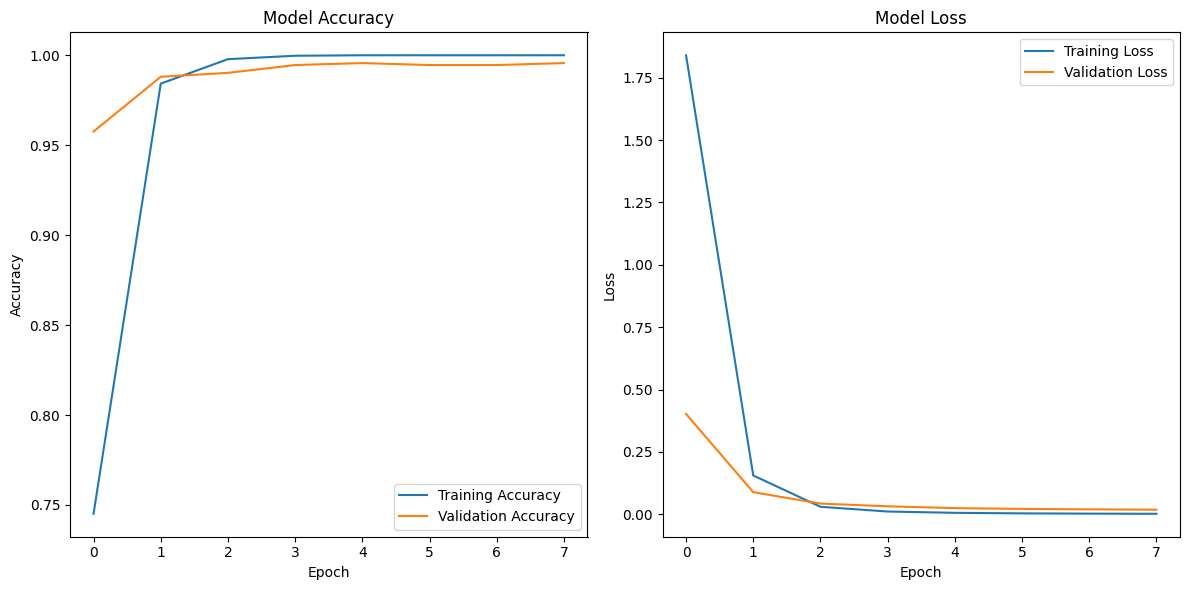

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model_USE_pred_probs = model_USE.predict(valid_dataset)
model_USE_pred_probs

29/29 [==============================] - 1s 9ms/step


array([[8.05261152e-06, 7.77254286e-07, 1.49950993e-05, ...,
        1.44718551e-05, 1.21933599e-05, 4.99214229e-06],
       [3.38291029e-05, 5.88284195e-07, 1.66607115e-05, ...,
        1.67506769e-05, 9.36814649e-06, 5.96691971e-05],
       [2.41206726e-06, 4.46592239e-08, 3.57730496e-05, ...,
        5.30722355e-06, 2.01138209e-05, 1.09043955e-04],
       ...,
       [4.27855266e-05, 6.29430679e-06, 3.45490776e-06, ...,
        3.93711874e-04, 3.35179061e-06, 4.39743999e-05],
       [1.53235305e-06, 3.87003956e-06, 1.86034031e-05, ...,
        8.79753679e-06, 3.47631940e-05, 1.19039059e-05],
       [8.27755059e-07, 7.36933927e-08, 3.20687359e-05, ...,
        1.44297940e-06, 6.87381635e-06, 5.19128662e-06]], dtype=float32)

In [ ]:
model_USE_preds = tf.argmax(model_USE_pred_probs, axis=1)
model_USE_preds

<tf.Tensor: shape=(920,), dtype=int64, numpy=
array([42, 29,  7,  3, 19, 42, 37, 42,  3, 40,  0,  0, 20, 21, 30, 31, 29,
       42,  8, 24,  9, 14, 44, 31, 15,  4,  0, 37,  2, 20, 23, 15, 40, 40,
       18, 36, 24,  8, 25, 17, 42, 36, 36, 14, 35, 26, 24, 44,  9, 37, 16,
       43, 38, 28, 38, 26, 37,  4,  7,  6, 25, 39, 12, 25, 29, 23,  9, 42,
       33, 29, 33, 38, 38, 20,  4,  7, 27, 22, 12, 28, 18,  6, 34, 24, 30,
        4,  0, 43, 10, 38, 41, 34, 38, 23, 21, 32, 13, 37, 34, 24,  7,  4,
       11, 20, 44, 11, 30, 37, 29, 10, 43, 11, 18, 40, 38, 22, 28, 36,  0,
       10, 37,  6, 38, 26, 45, 41, 13,  7, 38, 35,  0, 22,  1, 33, 37, 13,
        1, 45,  7, 23,  4,  1, 14, 35, 12, 35, 44, 45,  2,  6, 18,  6, 16,
       43, 15, 29, 24, 19,  3, 30, 16,  5,  7,  3,  1, 25,  1, 43,  8, 15,
       35, 23,  2, 29, 31,  8, 17,  0,  8,  8, 28,  6, 19, 18, 13,  9, 27,
       25, 12, 31,  3, 21, 20, 15, 27,  0, 32, 28, 41,  5, 20, 12, 41, 31,
       36,  5, 35, 37, 15, 16, 28,  4, 36, 44, 16, 23,

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """

  model_accuracy = accuracy_score(y_true, y_pred) * 100

  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
model_USE_results = calculate_results(y_valid_le, model_USE_preds)
model_USE_results

{'accuracy': 99.56521739130434,
 'precision': 0.9958592132505175,
 'recall': 0.9956521739130435,
 'f1': 0.9956494548223075}

In [ ]:
!pip install colorama
from colorama import Fore, Style

def random_predictions(model, X_valid, y_valid, num_samples=5):

    category_reverse_mapping = class_names


    random_indices = np.random.choice(np.arange(len(X_valid)), size=num_samples, replace=False)


    random_X_samples = X_valid[random_indices]
    random_y_samples = y_valid[random_indices]


    y_pred_probs = model.predict(random_X_samples)
    y_pred = np.argmax(y_pred_probs, axis=1)


    for i in range(num_samples):
        text = random_X_samples[i]
        true_label = np.argmax(random_y_samples[i])
        predicted_label = y_pred[i]


        text_color = Fore.GREEN if true_label == predicted_label else Fore.RED

        print(f"\nSample {i + 1}:")
        print(f"Text: {text}")
        print(text_color + f"True: {category_reverse_mapping[true_label]} \n Predicted: {category_reverse_mapping[predicted_label]}" + Style.RESET_ALL)

In [ ]:
random_predictions(model_USE, X_valid, y_valid, num_samples=20)

1/1 [==============================] - 1s 516ms/step

Sample 1:
Text: vomiting yellowish skin abdominal pain distention abdomen history alcohol consumption fluid overload
True: Alcoholic Hepatitis 
 Predicted: Alcoholic Hepatitis

Sample 2:
Text: ive cough thats lingering day difficulty breathing fever skyhigh im feeling weak tired ive also producing lot mucus cough overwhelming deal symptom im getting frustrated
True: Bronchial Asthma 
 Predicted: Bronchial Asthma

Sample 3:
Text: breathlessness sweating chest pain
True: Heart Attack 
 Predicted: Heart Attack

Sample 4:
Text: vomiting headache nausea loss balance unsteadiness
True: (Vertigo) Paroymsal  Positional Vertigo 
 Predicted: (Vertigo) Paroymsal  Positional Vertigo

Sample 5:
Text: stomach pain ulcer tongue vomiting cough chest pain
True: Gerd 
 Predicted: Gerd

Sample 6:
Text: woke morning headache chest pain day gone ive also feeling dizzy unsteady foot
True: Hypertension 
 Predicted: Hypertension

Sample 7:
Text: constipati

In [ ]:
textx = "I have a runny nose, fever and cough"
text2 = "I am feeling thirsty , losing weight, blurry vision, slow hearing sores"

In [ ]:
def predict_on_sentence(model, sentence, category_reverse_mapping, top_n=2):
    """
    Uses model to make a prediction on sentence.

    Returns the sentence, the predicted labels and the prediction probabilities.
    """
    pred_prob = model.predict([sentence])
    pred_label = np.round(pred_prob).astype(int)[0]  # Converting to int to match the format of the labels


    top_indices = np.argsort(pred_prob[0])[::-1][:top_n]


    top_labels_str = [category_reverse_mapping[i] for i in top_indices]
    top_probs_str = [pred_prob[0][i] for i in top_indices]

    print("Top Predictions:")
    for label, prob in zip(top_labels_str, top_probs_str):
        print(f"Disease: {label}, Probability: {prob *100} %")

    print(f"Text:\n{sentence}")


In [ ]:
predict_on_sentence(model=model_USE,
                    sentence=text2,
                    category_reverse_mapping=class_names)

1/1 [==============================] - 0s 42ms/step
Top Predictions:
Disease: Diabetes, Probability: 68.27918887138367 %
Disease: Migraine, Probability: 12.627720832824707 %
Text:
I am feeling thirsty , losing weight, blurry vision, slow hearing sores
